In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()
import numpy as np
import pandas as pd
import json

# Set the output directory here
outdir = 'outdir_aic_jankowski'
outdir_w = 'outdir_aic_jankowski_without'

In [2]:
print('Classification published by Jankowski et al. (2018):')

Jankowski_2018_data = pd.read_csv('../catalogue/Jankowski_2018_data.csv')
Jankowski_2018_model_name_map = {
    'pl': 'simple power law',
    'broken pl': 'broken power law',
    'lps': 'log-parabolic spectrum',
    'low turn-over': 'low-frequency turn-over power law',
    'hard-ut-off': 'high-frequency cut-off power law',
    '-': '(Unclassified)'
}
x1 = Jankowski_2018_data['class'].value_counts().index.to_numpy()
x1 = np.array([Jankowski_2018_model_name_map[i] for i in x1])
y1 = Jankowski_2018_data['class'].value_counts().to_numpy()
y1_unc = y1[x1 == '(Unclassified)'][0]
y1_sum_exc = y1.sum() - y1_unc
x1, y1 = x1[x1 != '(Unclassified)'], y1[x1 != '(Unclassified)']
x1 = np.append(x1, '(Unclassified)')
y1 = np.append(y1, y1_unc)
pd.DataFrame({
    'Model': x1,
    'Count': [f'{v} / {y1.sum()} ({v/y1.sum()*100:.1f}%)' for i, v in enumerate(y1)],
    'Count (excluding unclassified)': [f'{v} / {y1_sum_exc} ({v/(y1_sum_exc)*100:.1f}%)'if x1[i] != '(Unclassified)' else '-' for i, v in enumerate(y1)]
})

Classification published by Jankowski et al. (2018):


,Model,Count,Count (excluding unclassified)
0,simple power law,276 / 441 (62.6%),276 / 349 (79.1%)
1,log-parabolic spectrum,35 / 441 (7.9%),35 / 349 (10.0%)
2,broken power law,25 / 441 (5.7%),25 / 349 (7.2%)
3,low-frequency turn-over power law,10 / 441 (2.3%),10 / 349 (2.9%)
4,high-frequency cut-off power law,3 / 441 (0.7%),3 / 349 (0.9%)
5,(Unclassified),92 / 441 (20.9%),-


In [3]:
model_name_map = {
    'simple_power_law': 'simple power law',
    'broken_power_law': 'broken power law',
    'log_parabolic_spectrum': 'log-parabolic spectrum',
    'low_frequency_turn_over_power_law': 'low-frequency turn-over power law',
    'high_frequency_cut_off_power_law': 'high-frequency cut-off power law',
}

print('Classification in the reproduced results, following Jankowski et al. (2018)\'s AIC method:')

with open(f'../output/results_aic_from_{outdir}.json', 'r', encoding='utf-8-sig') as f:
    results_aic = pd.DataFrame(json.load(f)).T
    results_aic['best_fitting'] = results_aic.iloc[:, :].idxmin(axis=1)
x2 = results_aic['best_fitting'].value_counts().index.to_numpy()
x2 = np.array([model_name_map[i] for i in x2])
y2 = results_aic['best_fitting'].value_counts().to_numpy()
y2_exc = [f'{v} / {y2.sum()} ({v/y2.sum()*100:.1f}%)' for i, v in enumerate(y2)]
x2 = np.append(x2, '(Unclassified)')
y2 = np.append(y2, 441 - y2.sum())
y2_exc = np.append(y2_exc, '-')
display(pd.DataFrame({
    'Model': x2,
    'Count': [f'{v} / {441} ({v/441*100:.1f}%)' for i, v in enumerate(y2)],
    'Count (excluding unclassified)': y2_exc
}))

print('Classification in the reproduced results, following Jankowski et al. (2018)\'s AIC method (without correction term):')

with open(f'../output/results_aic_from_{outdir_w}.json', 'r', encoding='utf-8-sig') as f:
    results_aicw = pd.DataFrame(json.load(f)).T
    results_aicw['best_fitting'] = results_aicw.iloc[:, :].idxmin(axis=1)
x2w = results_aicw['best_fitting'].value_counts().index.to_numpy()
x2w = np.array([model_name_map[i] for i in x2w])
y2w = results_aicw['best_fitting'].value_counts().to_numpy()
y2w_exc = [f'{v} / {y2w.sum()} ({v/y2w.sum()*100:.1f}%)' for i, v in enumerate(y2w)]
x2w = np.append(x2w, '(Unclassified)')
y2w = np.append(y2w, 441 - y2w.sum())
y2w_exc = np.append(y2w_exc, '-')
display(pd.DataFrame({
    'Model': x2w,
    'Count': [f'{v} / {441} ({v/441*100:.1f}%)' for i, v in enumerate(y2w)],
    'Count (excluding unclassified)': y2w_exc
}))

Classification in the reproduced results, following Jankowski et al. (2018)'s AIC method:


,Model,Count,Count (excluding unclassified)
0,simple power law,214 / 441 (48.5%),214 / 313 (68.4%)
1,log-parabolic spectrum,53 / 441 (12.0%),53 / 313 (16.9%)
2,broken power law,32 / 441 (7.3%),32 / 313 (10.2%)
3,high-frequency cut-off power law,8 / 441 (1.8%),8 / 313 (2.6%)
4,low-frequency turn-over power law,6 / 441 (1.4%),6 / 313 (1.9%)
5,(Unclassified),128 / 441 (29.0%),-


Classification in the reproduced results, following Jankowski et al. (2018)'s AIC method (without correction term):


,Model,Count,Count (excluding unclassified)
0,simple power law,120 / 441 (27.2%),120 / 313 (38.3%)
1,broken power law,95 / 441 (21.5%),95 / 313 (30.4%)
2,log-parabolic spectrum,73 / 441 (16.6%),73 / 313 (23.3%)
3,high-frequency cut-off power law,15 / 441 (3.4%),15 / 313 (4.8%)
4,low-frequency turn-over power law,10 / 441 (2.3%),10 / 313 (3.2%)
5,(Unclassified),128 / 441 (29.0%),-


Comparison:


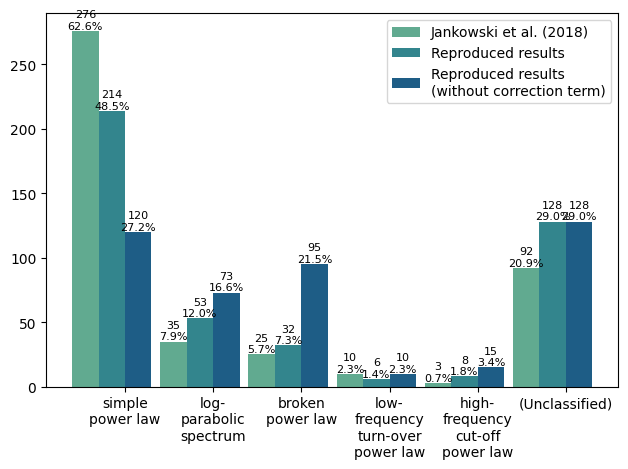

In [4]:
print('Comparison:')

fig, ax = plt.subplots()

# sort by x1
x2, y2 = zip(*sorted(zip(x2, y2), key=lambda x: x1.tolist().index(x[0])))
x2w, y2w = zip(*sorted(zip(x2w, y2w), key=lambda x: x1.tolist().index(x[0])))

bar_width = 0.3
colors = sns.color_palette('crest', 3)
bar1 = ax.bar(np.arange(len(x1)) - bar_width, y1, bar_width, label='Jankowski et al. (2018)', color=colors[0])
bar2 = ax.bar(np.arange(len(x2)), y2, bar_width, label='Reproduced results', color=colors[1])
bar3 = ax.bar(np.arange(len(x2)) + bar_width, y2w, bar_width, label='Reproduced results\n(without correction term)', color=colors[2])
bar1_labels = [f'{v}\n{v/y1.sum()*100:.1f}%' for i, v in enumerate(y1)]
bar2_labels = [f'{v}\n{v/441*100:.1f}%' for i, v in enumerate(y2)]
bar3_labels = [f'{v}\n{v/441*100:.1f}%' for i, v in enumerate(y2w)]
for i, (bar1_label, bar2_label, bar3_label) in enumerate(zip(bar1_labels, bar2_labels, bar3_labels)):
    ax.text(i - bar_width, y1[i], bar1_label, ha='center', va='bottom', fontsize=8)
    ax.text(i, y2[i], bar2_label, ha='center', va='bottom', fontsize=8)
    ax.text(i + bar_width, y2w[i], bar3_label, ha='center', va='bottom', fontsize=8)

ax.set_xticks(np.arange(len(x2)) + bar_width / 2)
ax.set_xticklabels([x.replace(' ', '\n').replace('-p','-\np').replace('-f','-\nf').replace('r\nl', 'r l') for x in x2])
ax.legend()
plt.tight_layout()
plt.show()